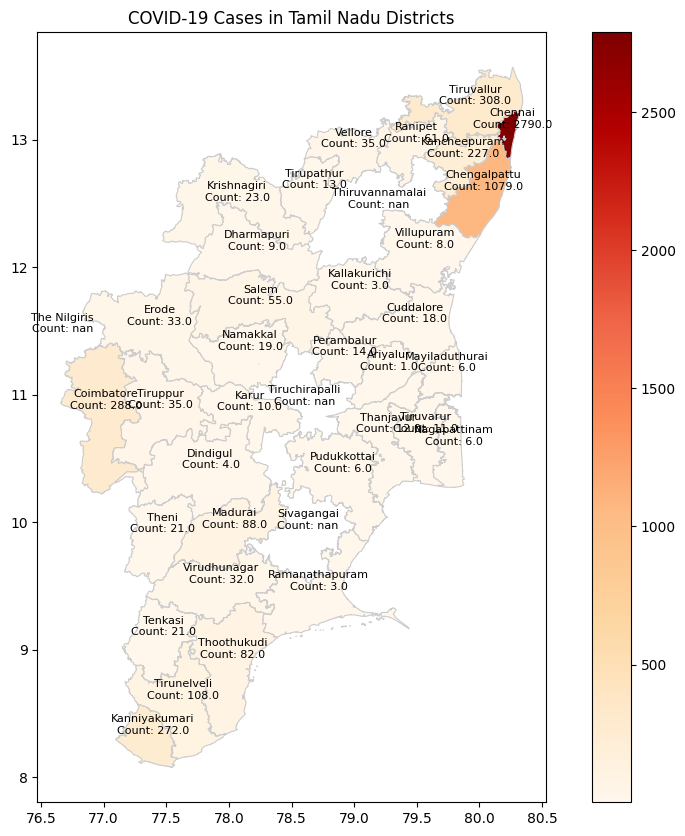

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Tamil Nadu district shapefile
tamilnadu_shapefile = gpd.read_file('Districts.shp')

# Load Covid-19 deaths dataset from CSV
csv_file_path = 'COVID.csv'
df = pd.read_csv(csv_file_path)

# Merge the shapefile data with the dataset
merged = tamilnadu_shapefile.set_index('dist_name').join(df.set_index('dist_name'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map using the 'Persons under Treatment including Home Treatment as on 24.06.2022' column
merged.plot(column='Persons under Treatment including Home Treatment as on 24.06.2022', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels for each district
for idx, row in merged.iterrows():
    # Get the centroid of the geometry
    centroid = row['geometry'].centroid
    
    # Add annotation with district name and count
    ax.annotate(text=f"{idx}\nCount: {row['Persons under Treatment including Home Treatment as on 24.06.2022']}",
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),  # Optional: Offset the text for better visibility
                textcoords='offset points',
                ha='center',
                fontsize=8)

# Set title
ax.set_title('COVID-19 Cases in Tamil Nadu Districts')

# Show the plot
plt.show()
